### Case : Titanic Dataset
- Data Understanding
- Inspecting the Outliers
- Inspecting the Null values
- Imputation Techniques
- EDA/ Data Visulaization
- Feature Engineering Aspects

## Import the Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

pd.set_option("display.max_columns",200)
pd.set_option("display.max_rows",None)

## Data Understanding

In [2]:
df = pd.read_csv("train.csv")

In [3]:
# inspect the first few rows
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# inspect the last few rows
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
# let us see the dataframe information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
# Let us now seep the spread of the dataframe
df.describe() # it will give the spread/statistics of all the numerical columns

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


- Hypothesis-1 : The children who are less than 2years old might be travelleing free of cost.

In [7]:
# We are checking the data spread in each percentiles
df.describe(percentiles =[.01,.05,.25,.50,.75,.90,.95,.99])

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
1%,9.900000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
5%,45.500000,0.000000,1.000000,4.000000,0.000000,0.000000,7.225000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
90%,802.000000,1.000000,3.000000,50.000000,1.000000,2.000000,77.958300


<AxesSubplot:xlabel='Fare', ylabel='Density'>

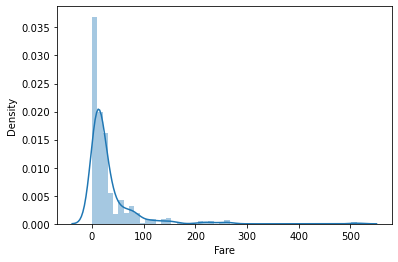

In [8]:
# Visualizing the distributon of fare
sns.distplot(df["Fare"])

- Fare : 
    - It is not normally distributed
    - It is right skewed

<AxesSubplot:xlabel='Fare'>

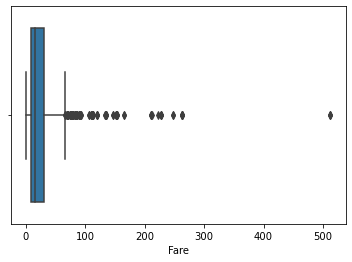

In [9]:
# let us plot the box plot to get the sense of the Fare column
sns.boxplot("Fare",data=df)

- Boxplot
    - Lower Whiskers
    - first Quartile (25th Percentile) - Q1
    - Median (50th Percentile)
    - Third Quartile (75th Percentile) - Q3
    - Upper Whiskers
- Anything beyond upper and lower whiskers might be considered as outliers.

- Maximum and Minimum values in the outliers is represented by : 
     - IQR (Inter quartile range) = Q1-Q3
     - Lower Whiskers : Q1 - 1.5*IQR
     - Upper Whiskers : Q3 + 1.5 *IQR

# We can handle the skewness in the dataset by performing certain transformations
    - Log Transformation
    - SQRT Transformation
    - Exponenetial Transformation
    - Power Transformation

In [10]:
np.log(df["Fare"])

0      1.981001
1      4.266662
2      2.070022
3      3.972177
4      2.085672
5      2.135148
6      3.948596
7      3.048088
8      2.409941
9      3.403555
10     2.815409
11     3.279030
12     2.085672
13     3.442819
14     2.061048
15     2.772589
16     3.371597
17     2.564949
18     2.890372
19     1.977547
20     3.258097
21     2.564949
22     2.083085
23     3.569533
24     3.048088
25     3.446410
26     1.977547
27     5.572154
28     2.064226
29     2.066331
30     3.322183
31     4.987167
32     2.047693
33     2.351375
34     4.408800
35     3.951244
36     1.978128
37     2.085672
38     2.890372
39     2.419630
40     2.248657
41     3.044522
42     2.066331
43     3.727600
44     2.064226
45     2.085672
46     2.740840
47     2.047693
48     3.076353
49     2.879198
50     3.681036
51     2.054124
52     4.340282
53     3.258097
54     4.126799
55     3.569533
56     2.351375
57     1.978128
58     3.323236
59     3.848018
60     1.978128
61     4.382027
62     4

<AxesSubplot:xlabel='Fare', ylabel='Density'>

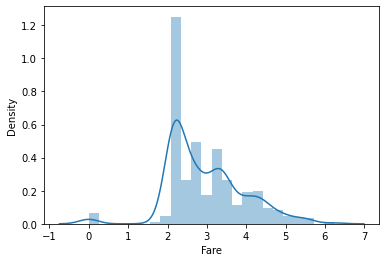

In [11]:
# log transformation on the fare column to handle skewness
sns.distplot(np.log1p(df["Fare"]))

<AxesSubplot:xlabel='Fare'>

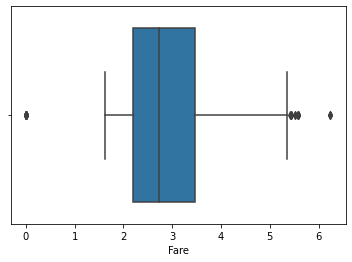

In [12]:
# Let us now visualize box plot
sns.boxplot(np.log1p(df["Fare"]))

In [13]:
df[df['Fare']==0].sort_values("Age")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S
822,823,0,1,"Reuchlin, Jonkheer. John George",male,38.0,0,0,19972,0.0,NaN,S
806,807,0,1,"Andrews, Mr. Thomas Jr",male,39.0,0,0,112050,0.0,A36,S
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,NaN,S
466,467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,NaN,S


- The Hypothesis-1 is False seeing the above subset of dataframe

In [14]:
df[df['Ticket'] == "LINE"]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S


- How to Handle the Outliers
    - First you can remove the outliers
    - You can perform transformations
    - You can cap the outliers
    - Segmentation 

In [15]:
# check the spread of the categorical columns
df.describe(include="object")

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Taylor, Mr. Elmer Zebley",male,CA. 2343,B96 B98,S
freq,1,577,7,4,644


- Hypothesis -2 : There could be a combined ticket on which a family might be travelling

In [16]:
df[df['Ticket']=='347082']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.275,NaN,S
119,120,0,3,"Andersson, Miss. Ellis Anna Maria",female,2.0,4,2,347082,31.275,NaN,S
541,542,0,3,"Andersson, Miss. Ingeborg Constanzia",female,9.0,4,2,347082,31.275,NaN,S
542,543,0,3,"Andersson, Miss. Sigrid Elisabeth",female,11.0,4,2,347082,31.275,NaN,S
610,611,0,3,"Andersson, Mrs. Anders Johan (Alfrida Konstant...",female,39.0,1,5,347082,31.275,NaN,S
813,814,0,3,"Andersson, Miss. Ebba Iris Alfrida",female,6.0,4,2,347082,31.275,NaN,S
850,851,0,3,"Andersson, Master. Sigvard Harald Elias",male,4.0,4,2,347082,31.275,NaN,S


In [17]:
df[df['Cabin'] =='B96 B98']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
390,391,1,1,"Carter, Mr. William Ernest",male,36.0,1,2,113760,120.0,B96 B98,S
435,436,1,1,"Carter, Miss. Lucile Polk",female,14.0,1,2,113760,120.0,B96 B98,S
763,764,1,1,"Carter, Mrs. William Ernest (Lucile Polk)",female,36.0,1,2,113760,120.0,B96 B98,S
802,803,1,1,"Carter, Master. William Thornton II",male,11.0,1,2,113760,120.0,B96 B98,S


In [18]:
df.groupby("Ticket")["Ticket"].count()

Ticket
110152                3
110413                3
110465                2
110564                1
110813                1
111240                1
111320                1
111361                2
111369                1
111426                1
111427                1
111428                1
112050                1
112052                1
112053                1
112058                1
112059                1
112277                1
112379                1
113028                1
113043                1
113050                1
113051                1
113055                1
113056                1
113059                1
113501                1
113503                1
113505                2
113509                1
113510                1
113514                1
113572                2
113760                4
113767                1
113773                1
113776                2
113781                4
113783                1
113784                1
113786                1
113787   

In [19]:
df[df['Ticket']=='110152']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
257,258,1,1,"Cherry, Miss. Gladys",female,30.0,0,0,110152,86.5,B77,S
504,505,1,1,"Maioni, Miss. Roberta",female,16.0,0,0,110152,86.5,B79,S
759,760,1,1,"Rothes, the Countess. of (Lucy Noel Martha Dye...",female,33.0,0,0,110152,86.5,B77,S


- We would change our Hypothesie-2 :
    There could be a combined ticket on which a family/friend circles might be travelling

In [20]:
## Let us now check the missing values
round((df.isnull().sum()/len(df))*100,2)

PassengerId     0.00
Survived        0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age            19.87
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.00
Cabin          77.10
Embarked        0.22
dtype: float64

- Handling missing values
    - Impute the values by different methods (Basic)
        - Mean
        - Mode
        - Median

## Visualization in Python 

### 1. How many people Survived.?

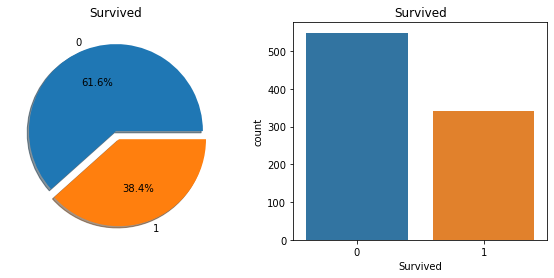

In [21]:
f, ax = plt.subplots(1,2,figsize=(10,4))

df['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct="%1.1f%%",shadow=True,ax=ax[0])
ax[0].set_title("Survived")
ax[0].set_ylabel("")

sns.countplot("Survived",data=df,ax=ax[1])
ax[1].set_title("Survived")

plt.show()

### 2. How many male and female Survived?

In [22]:
df.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

In [23]:
pd.crosstab(df.Sex,df.Survived,margins = True).style.background_gradient(cmap="summer_r")

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


In [24]:
df[['Sex','Survived']].groupby(['Sex']).mean()

,Survived
Sex,
female,0.742038
male,0.188908


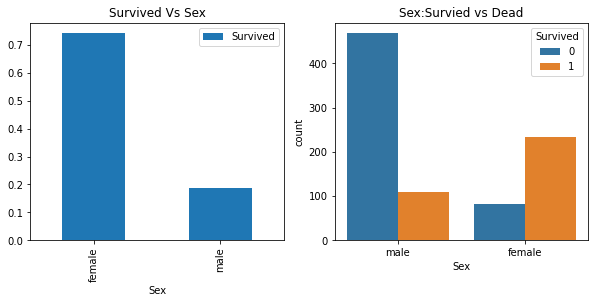

In [25]:
f, ax = plt.subplots(1,2,figsize=(10,4))
df[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title("Survived Vs Sex")

sns.countplot("Sex",hue="Survived",data = df, ax=ax[1])
ax[1].set_title("Sex:Survied vs Dead")
plt.xticks()
plt.show()

- Obervations : 
    - The Female Vs Male Survival Ratio is 78:18 apprx.
    - More number of Male died as comared to females.

### 3. How many people survived in each class.?

In [26]:
pd.crosstab(df.Pclass,df.Survived,margins = True).T.style.background_gradient(cmap="summer_r")

Pclass,1,2,3,All
Survived,,,,
0,80,97,372,549
1,136,87,119,342
All,216,184,491,891


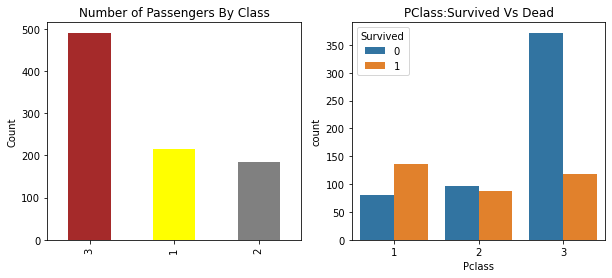

In [27]:
f, ax = plt.subplots(1,2,figsize=(10,4))
df['Pclass'].value_counts().plot.bar(color=['brown','yellow','grey'],ax=ax[0])
ax[0].set_title("Number of Passengers By Class")
ax[0].set_ylabel("Count")

sns.countplot("Pclass",hue="Survived",data=df, ax=ax[1])
ax[1].set_title("PClass:Survived Vs Dead")
plt.show()

### 3. How many male and Females Survived within each Class.?

In [28]:
pd.crosstab([df.Sex,df.Survived],df.Pclass, margins=True).style.background_gradient(cmap="summer_r")

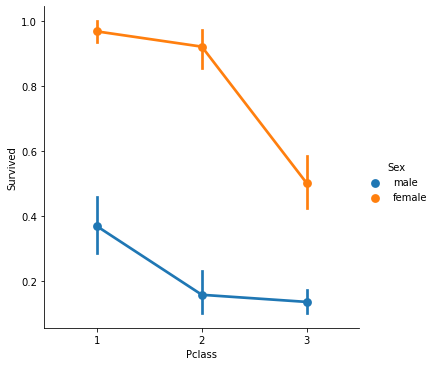

In [29]:
sns.factorplot("Pclass","Survived",hue="Sex", data = df)
plt.show()

- Observartions :
    - The survival Ratio of females are more than males irrespective of any class.
    - The Survival Ratio decreases as the class increases.

## Continuous Feature -> Age


### 4. How age is moving with respect to class?

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

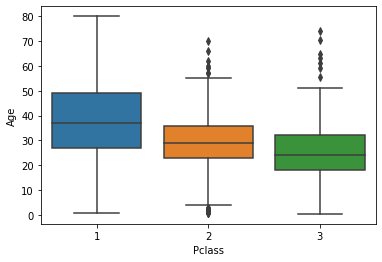

In [30]:
sns.boxplot("Pclass","Age",data=df)

In [31]:
df[df['Age'] ==80]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0,A23,S


In [32]:
df.groupby("Pclass")['Age'].mean()

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

### 6. How many male & Female Surived based on the Age group.?

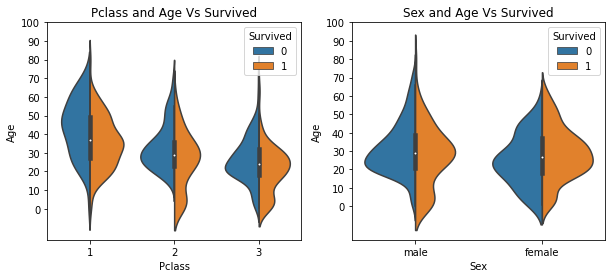

In [33]:
f, ax = plt.subplots(1,2,figsize=(10,4))
sns.violinplot("Pclass","Age",hue="Survived",data=df,ax=ax[0],split=True)
ax[0].set_title("Pclass and Age Vs Survived")
ax[0].set_yticks(range(0,110,10))

sns.violinplot("Sex","Age",hue="Survived",data=df, ax=ax[1],split=True)
ax[1].set_title("Sex and Age Vs Survived")
ax[1].set_yticks(range(0,110,10))

plt.show()

In [39]:
df[(df['Pclass']==3) & (df['Age']<10)].sort_values("Age")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
803,804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,NaN,C
644,645,1,3,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,19.2583,NaN,C
469,470,1,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,NaN,C
381,382,1,3,"Nakid, Miss. Maria (""Mary"")",female,1.00,0,2,2653,15.7417,NaN,C
788,789,1,3,"Dean, Master. Bertram Vere",male,1.00,1,2,C.A. 2315,20.5750,NaN,S
164,165,0,3,"Panula, Master. Eino Viljami",male,1.00,4,1,3101295,39.6875,NaN,S
386,387,0,3,"Goodwin, Master. Sidney Leonard",male,1.00,5,2,CA 2144,46.9000,NaN,S
172,173,1,3,"Johnson, Miss. Eleanor Ileen",female,1.00,1,1,347742,11.1333,NaN,S
824,825,0,3,"Panula, Master. Urho Abraham",male,2.00,4,1,3101295,39.6875,NaN,S
642,643,0,3,"Skoog, Miss. Margit Elizabeth",female,2.00,3,2,347088,27.9000,NaN,S


## Nominal Feature : Name

In [35]:
# feature enginneering for Name : We wil extract the Initials

df.Name.str.extract('([A-Za-z]+)\.')

,0
0,Mr
1,Mrs
2,Miss
3,Mrs
4,Mr
5,Mr
6,Mr
7,Master
8,Mrs
9,Mrs


In [40]:
df['Initial'] = df.Name.str.extract('([A-Za-z]+)\.')

In [41]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [42]:
pd.crosstab(df['Initial'],df.Sex).T.style.background_gradient(cmap="summer_r")

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [43]:
df[df['Initial'] == 'Mlle']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial
641,642,1,1,"Sagesser, Mlle. Emma",female,24.0,0,0,PC 17477,69.3000,B35,C,Mlle
710,711,1,1,"Mayne, Mlle. Berthe Antonine (""Mrs de Villiers"")",female,24.0,0,0,PC 17482,49.5042,C90,C,Mlle


In [44]:
df[df['Initial'] == 'Mme']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial
369,370,1,1,"Aubart, Mme. Leontine Pauline",female,24.0,0,0,PC 17477,69.3,B35,C,Mme


In [45]:
df['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],
                     ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'], inplace = True)

In [46]:
pd.crosstab(df['Initial'],df.Sex).T.style.background_gradient(cmap="summer_r")

Initial,Master,Miss,Mr,Mrs,Other
Sex,,,,,
female,0,186,1,127,0
male,40,0,528,0,9


In [47]:
df.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

## Fill Missing Age on the basis of Initial

In [51]:
df.loc[(df['Age'].isnull()) & (df.Initial =='Master'),"Age"] = 5
df.loc[(df['Age'].isnull()) & (df.Initial =='Miss'),"Age"] = 22
df.loc[(df['Age'].isnull()) & (df.Initial =='Mr'),"Age"] = 33
df.loc[(df['Age'].isnull()) & (df.Initial =='Mrs'),"Age"] = 36
df.loc[(df['Age'].isnull()) & (df.Initial =='Other'),"Age"] = 46

In [52]:
df['Age'].isnull().sum()

0

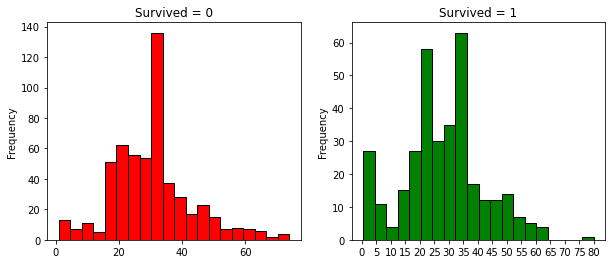

In [55]:
f,ax = plt.subplots(1,2,figsize=(10,4))
df[df['Survived']==0].Age.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red')
ax[0].set_title("Survived = 0")
x1 =list(range(0,85,5))
plt.xticks(x1)


df[df['Survived']==1].Age.plot.hist(ax=ax[1],bins=20,edgecolor='black',color='green')
ax[1].set_title("Survived = 1")
x2 =list(range(0,85,5))
plt.xticks(x2)
plt.show()

- Observations :
    - Toddles (age<5) were saved in large numbers. 
    - The 80 yrs old passenger survived
    - Max number of death was in age group of 30-40.

### How many people survived in each class on the basis of their age group

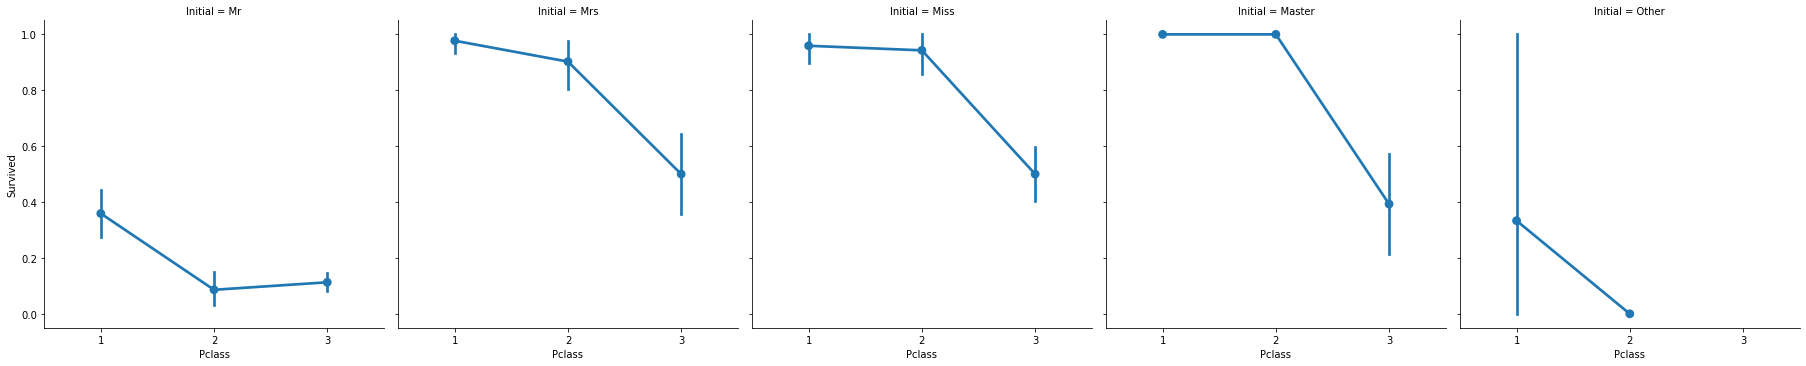

In [68]:
sns.factorplot('Pclass','Survived',col='Initial',data=df)

## Embarked : Categorical Variable

In [69]:
pd.crosstab(df.Pclass,df.Embarked,margins=True).style.background_gradient(cmap='summer_r')

Embarked,C,Q,S,All
Pclass,,,,
1,85,2,127,214
2,17,3,164,184
3,66,72,353,491
All,168,77,644,889


In [70]:
pd.crosstab([df.Pclass,df.Embarked],[df.Sex,df.Survived],margins=True).style.background_gradient(cmap='summer_r')

### Chances of survival by Port of Embarkation

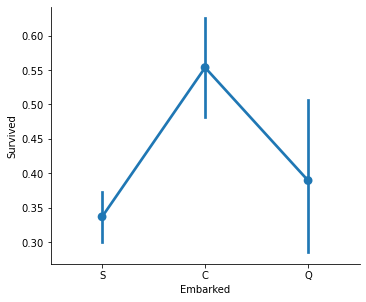

In [73]:
sns.factorplot('Embarked','Survived',data=df)
fig = plt.gcf()
fig.set_size_inches(5,4)
plt.show()

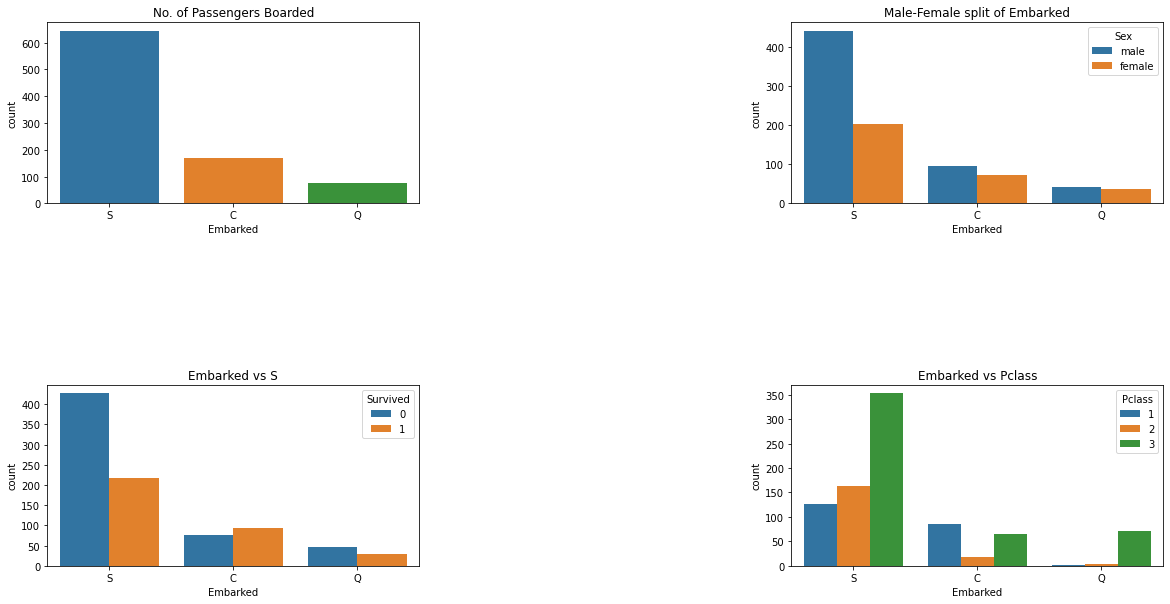

In [78]:
f,ax = plt.subplots(2,2,figsize=(20,10))
sns.countplot('Embarked',data=df,ax=ax[0,0])
ax[0,0].set_title("No. of Passengers Boarded")

sns.countplot('Embarked',hue='Sex',data=df,ax=ax[0,1])
ax[0,1].set_title("Male-Female split of Embarked")

sns.countplot('Embarked',hue='Survived',data=df,ax=ax[1,0])
ax[1,0].set_title("Embarked vs S")

sns.countplot('Embarked',hue='Pclass',data=df,ax=ax[1,1])
ax[1,1].set_title("Embarked vs Pclass")

plt.subplots_adjust(wspace=1, hspace=1)
plt.show()

In [ ]:
# Impute the values in Emabrked Column
# Mode Imputation or you can ipute with port S

In [81]:
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)

In [82]:
df['Embarked'].isnull().sum()

0

## SibSp : Discrete Feature
This feature represents whether the person is alone or with his family members.<br>
Sibling : Brother, Sister, Step Brother, Step Sister<br>
Spouse : Husband and Wife<br>

In [83]:
pd.crosstab(df.SibSp,df.Survived).style.background_gradient(cmap='summer_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


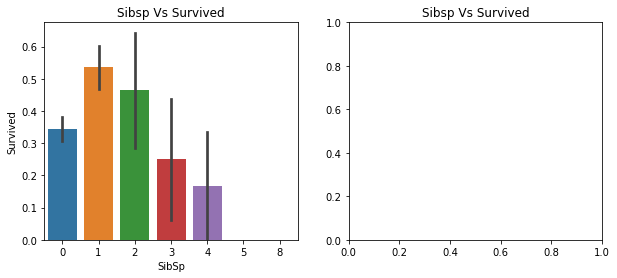

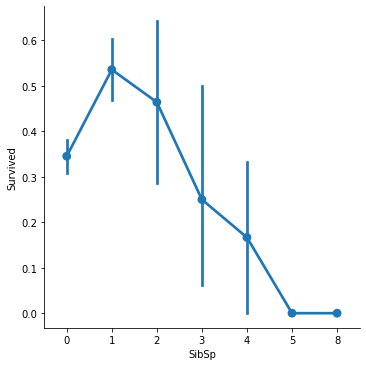

In [86]:
f, ax = plt.subplots(1,2, figsize=(10,4))
sns.barplot('SibSp','Survived',data=df, ax=ax[0])
ax[0].set_title('Sibsp Vs Survived')
sns.factorplot('SibSp','Survived',data=df,ax=ax[1])
ax[1].set_title('Sibsp Vs Survived')
plt.show()

### Parch

In [89]:
pd.crosstab(df.Parch,df.Survived).style.background_gradient(cmap='summer_r')

Survived,0,1
Parch,,
0,445,233
1,53,65
2,40,40
3,2,3
4,4,0
5,4,1
6,1,0


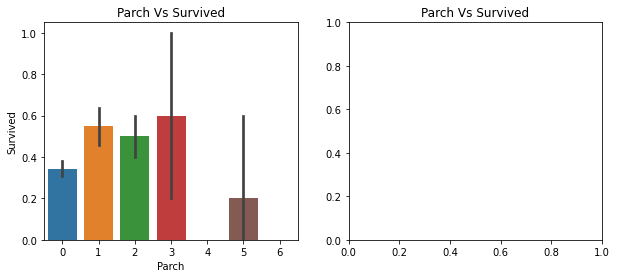

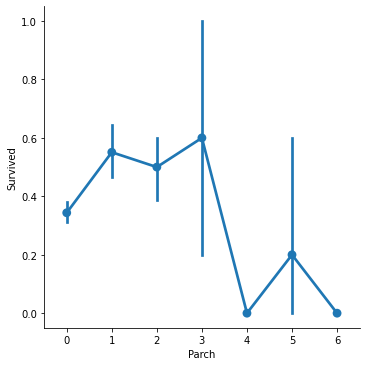

In [90]:
f, ax = plt.subplots(1,2, figsize=(10,4))
sns.barplot('Parch','Survived',data=df, ax=ax[0])
ax[0].set_title('Parch Vs Survived')
sns.factorplot('Parch','Survived',data=df,ax=ax[1])
ax[1].set_title('Parch Vs Survived')
plt.show()

## Continuous Feature : Fare

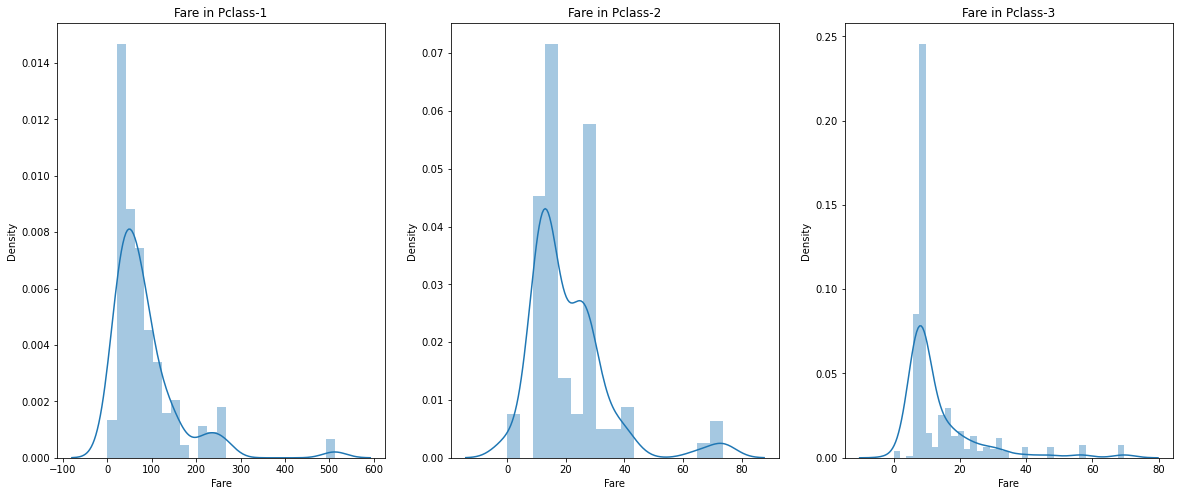

In [91]:
f,ax = plt.subplots(1,3,figsize=(20,8))
sns.distplot(df.loc[df['Pclass']==1,'Fare'],ax=ax[0])
ax[0].set_title("Fare in Pclass-1")
sns.distplot(df.loc[df['Pclass']==2,'Fare'],ax=ax[1])
ax[1].set_title("Fare in Pclass-2")
sns.distplot(df.loc[df['Pclass']==3,'Fare'],ax=ax[2])
ax[2].set_title("Fare in Pclass-3")
plt.show()

#### Observations :
1. Sex : The chances of survival for female is high as compared to male.
2. Pclass : As the Pclass increases he survival ratio decreases.
3. Age : Children less than 5-10 years old have high chances of survival. Passengers between age group of 15-35 died more.
4. Embarked : If the paseengers is boarding from port C his survival rate is high as compared to port-S and Q.
5. Parch +SibSp : Having 1-2 Sibling, spouse on board or 1-3 Parents shows a greater chances of Survival.

## Correlation between the features

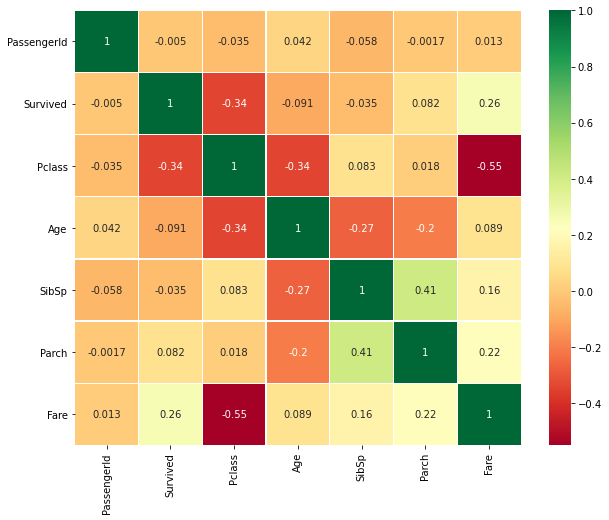

In [92]:
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig= plt.gcf()
fig.set_size_inches(10,8)
plt.show()

## Feature Engineering

#### Age is a continuous feature & we will convert this to dsicrete feature, as ML algorithms have problems with delaing with continuous variables.

Min Age :0 
Max : 80
bins = 5
80/5 = 16 (bin size)
0-16
16-32
32-48
48-64
64-80

In [93]:
# convert the Age feature to age-Bands
df['Age_band'] = 0
df.loc[df['Age']<=16,'Age_band'] =0
df.loc[ (df['Age']>16) & (df['Age']<=32),'Age_band'] =1
df.loc[(df['Age']>32) & (df['Age']<=48),'Age_band'] =2
df.loc[(df['Age']>48) & (df['Age']<=64),'Age_band'] =3
df.loc[(df['Age']>64),'Age_band'] =4

In [99]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,2


In [100]:
df['Age_band'].value_counts().to_frame().style.background_gradient(cmap='summer_r')

,Age_band
1,382
2,325
0,104
3,69
4,11


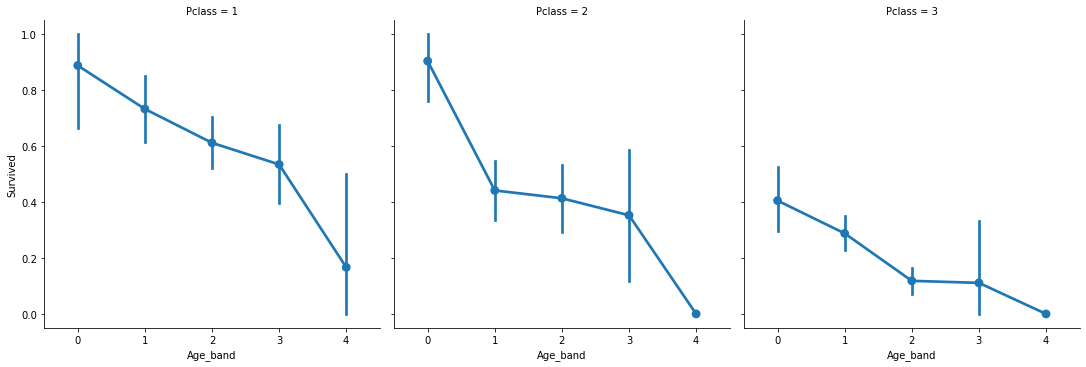

In [101]:
sns.factorplot('Age_band','Survived',data=df,col='Pclass')

- Observation : Survival Rate decreases as the age increases irrespective of any class.

## Family Size : SibSp + Parch
## Alone : If family size is zero then it is evident that person is travelling alone

In [105]:
df['Family_size'] = 0
df['Family_size'] = df['SibSp'] + df['Parch']
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band,Family_size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,2,0


In [107]:
df['Alone'] = 0
df.loc[df['Family_size']==0,'Alone'] = 1 # 1 means travelling alone 0 means travelling with family

In [108]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band,Family_size,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,2,0,1


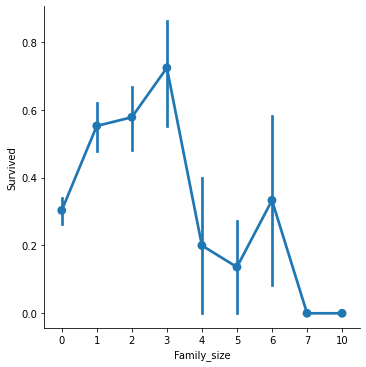

In [109]:
sns.factorplot('Family_size','Survived',data=df)

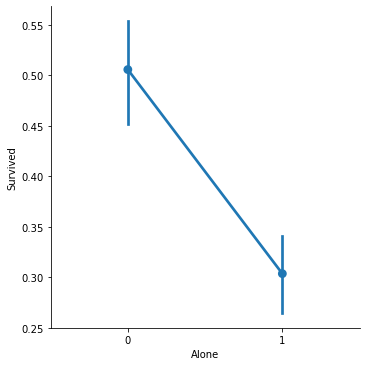

In [110]:
sns.factorplot('Alone','Survived',data=df)

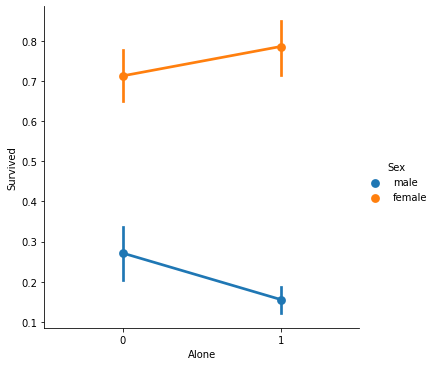

In [111]:
sns.factorplot('Alone','Survived',data=df,hue='Sex')

- Observation : If Feamles are travelling alone then theri survival rate is high as compared to the male who are travelling alone.

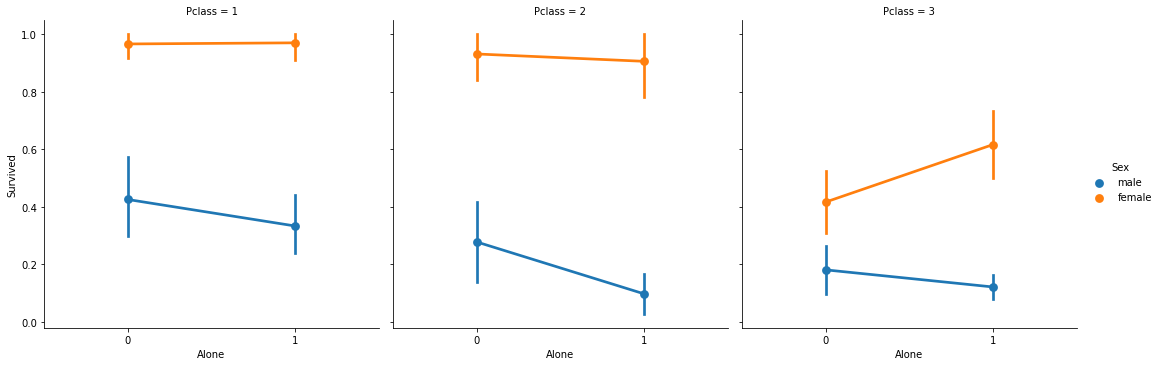

In [112]:
sns.factorplot('Alone','Survived',data=df,hue='Sex',col='Pclass')

- Observation : If females are travelling alone in Pclass-3 their survival chances are better as compared to the femlaes who are traveeling in the same class and acompanied by the parents/family.

### Fare : Fare_range

In [117]:
df['Fare_range'] = pd.qcut(df['Fare'],4)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band,Family_size,Alone,Fare_range
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1,1,0,"(-0.001, 7.91]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2,1,0,"(31.0, 512.329]"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1,0,1,"(7.91, 14.454]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2,1,0,"(31.0, 512.329]"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,2,0,1,"(7.91, 14.454]"


In [120]:
df.groupby('Fare_range')['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')

,Survived
Fare_range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


- As the fare range increases the survival rate increases.

In [122]:
# Convert the fare column to fare_bands
df['Fare_band'] = 0
df.loc[df['Fare']<=7.91,'Fare_band'] = 0
df.loc[(df['Fare']>7.91) & (df['Fare']<=14.454),'Fare_band'] = 1
df.loc[(df['Fare']>14.454) & (df['Fare']<=31.0),'Fare_band'] = 2
df.loc[(df['Fare']>31.0) & (df['Fare']<=513),'Fare_band'] = 3

In [123]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band,Family_size,Alone,Fare_range,Fare_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1,1,0,"(-0.001, 7.91]",0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2,1,0,"(31.0, 512.329]",3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1,0,1,"(7.91, 14.454]",1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2,1,0,"(31.0, 512.329]",3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,2,0,1,"(7.91, 14.454]",1


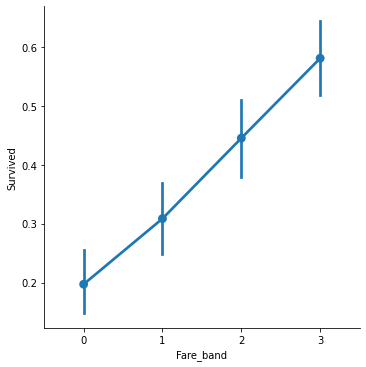

In [124]:
sns.factorplot('Fare_band','Survived',data=df)

### Ml Algorithms donot undertsand the alhapbets/chratacers
we will convert the string to numerical values

In [133]:
df['Sex'].replace(['male','female'],[0,1],inplace=True)
df['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)
df['Initial'].replace(['Mr','Mrs','Miss','Master','Other'],[0,1,2,3,4], inplace = True)

In [134]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band,Family_size,Alone,Fare_range,Fare_band
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1,1,0,"(-0.001, 7.91]",0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1,1,2,1,0,"(31.0, 512.329]",3
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,2,1,0,1,"(7.91, 14.454]",1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0,1,2,1,0,"(31.0, 512.329]",3
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0,0,2,0,1,"(7.91, 14.454]",1


In [136]:
# Drop the unnecessary columns
cols_to_drop=['PassengerId','Cabin','Ticket','Age','Fare','Fare_range','Name']
df.drop(cols_to_drop,inplace=True,axis=1)

In [139]:
df.head()

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Initial,Age_band,Family_size,Alone,Fare_band
0,0,3,0,1,0,0,0,1,1,0,0
1,1,1,1,1,0,1,1,2,1,0,3
2,1,3,1,0,0,0,2,1,0,1,1
3,1,1,1,1,0,0,1,2,1,0,3
4,0,3,0,0,0,0,0,2,0,1,1


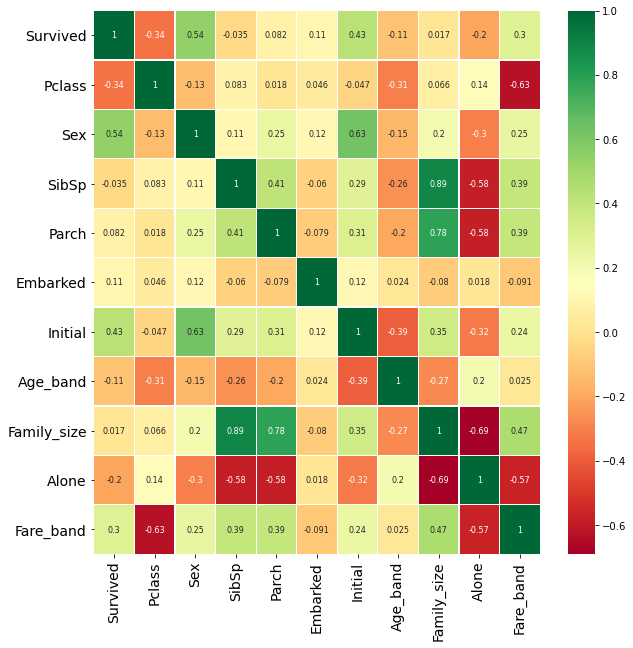

In [144]:
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2, annot_kws={'size':8})
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

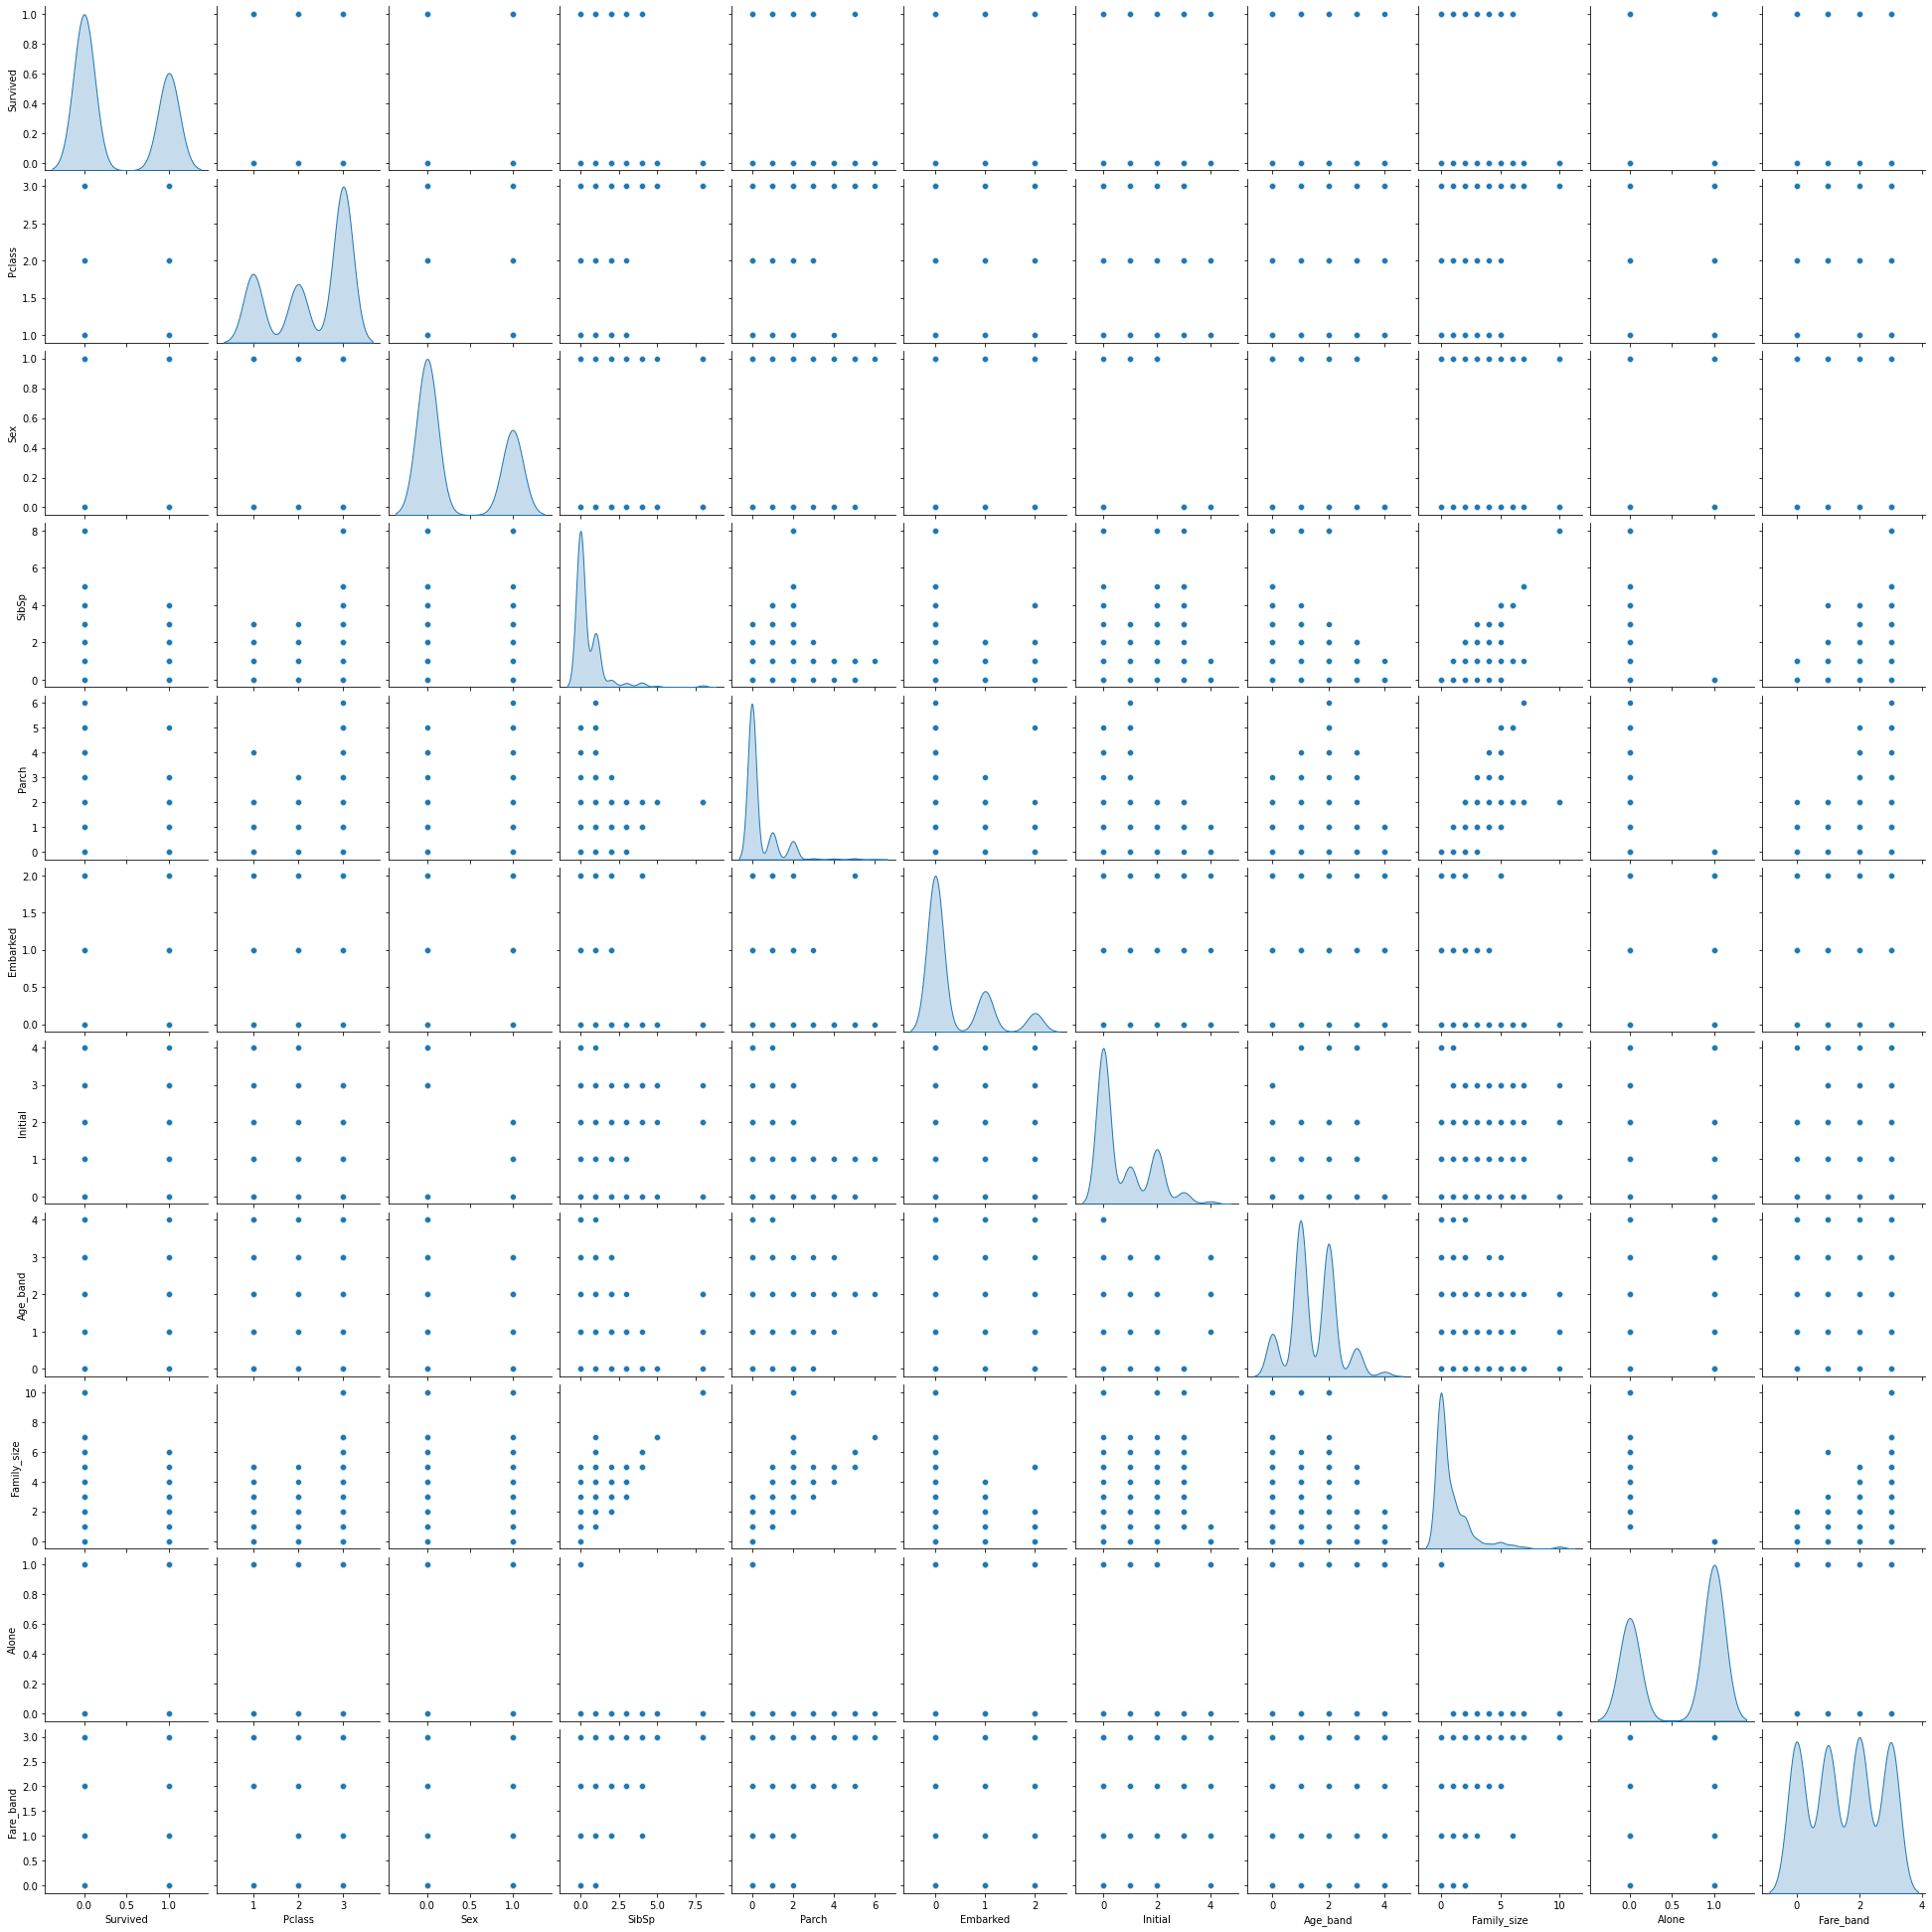

In [147]:
sns.pairplot(df,diag_kind='kde')